In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import random
import math

In [137]:
df = pd.read_csv('housing.csv', header=None, sep='\s+')  # sep='\s+' or  sep='\t' or
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


df.columns = column_names
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\akaku\AppData\Local\Temp\ipykernel_4644\743828371.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', header=None, sep='\s+')  # sep='\s+' or  sep='\t' or


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [138]:
X = df.drop(df.columns[-1], axis=1).to_numpy()
y = df['MEDV'].to_numpy()

In [139]:
test_size = 0.25

row_count = X.shape[0] 
row_count_in_samples = int(row_count * test_size)

indixes = np.random.permutation(row_count)

test_indices = indixes[:row_count_in_samples]
train_indices = indixes[row_count_in_samples:]


X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

Linear Regression 

In [140]:
def linear_regression(
        X: np.ndarray,
        y: np.ndarray,
        learning_rate: float = 0.01,
        iterations: int = 5000,
        coef_umensheniya_learning_rate: float = 0.001,
        epsilon: float = 1e-4
    ) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Линейная регрессия.

    :param X: Исходная матрица.
    :param y: Целевые значения.
    :param learning_rate: Начальная скорость.
    :param iterations: максимальное количество итераций.
    :param coef_umensheniya_learning_rate: Коэффициент уменьшения скорости сходимости.
    :param epsilon: показатель качества модели для досрочного выхода из обучения.
    :return: Кортеж: 
        - weights: Веса.
        - X_mean: Средние значения.
        - X_std: Стандартные отклонения.
        - weights_change_history: История изменения весов.
    """
    # нормализация признаков
    X_mean = np.mean(X, axis=0 )
    X_std = np.std(X, axis=0)
    # Избегаем деления на ноль
    X_std[X_std == 0] = 1
    X_normalized = (X - X_mean) / X_std
    
    # Добавление столбца единиц для свободного члена
    row, col = X_normalized.shape
    X_b = np.column_stack([np.ones(row), X_normalized])

    weights = np.random.randn(col + 1)
    weights_change_history = []

    for i in range(iterations):
        y_pred = X_b @ weights
        error = y_pred - y
        error_absolute = np.sign(error) # этот вариант сходится в 2 раза медленнее 5000 iter vs 10000 iter

        gradient = (2 / row) * X_b.T @ error
        current_lr = learning_rate * (1 / (1 + coef_umensheniya_learning_rate * i))
        old_weights = weights.copy()
        weights = weights - current_lr * gradient

        # Проверяем изменение весов
        weight_change = np.linalg.norm(weights - old_weights)
        weights_change_history.append(weight_change)

        if weight_change < epsilon:
            print(f"Сходимость достигнута на итерации {i}, изменение весов: {weight_change:.2e}")
            break

        if i == iterations - 1:
            print(f"Заданная точность НЕ достигнута за {iterations} шагов, последнее изменение весов: {weight_change:.2e}")
    
    return weights, X_mean, X_std, weights_change_history

def predict(X, weights, X_mean, X_std):
    """
    Предсказание.
    
    :param X: Исходная матрица.
    :param weights: Веса.
    :param X_mean:Средние значения.
    :param X_std: Стандартные отклонения.
    :return: Предсказание.
    """
    X_normalized = (X - X_mean) / X_std
    row = X_normalized.shape[0]
    X_b = np.column_stack([np.ones(row), X_normalized])
    return X_b @ weights

In [154]:
weights, X_mean, X_std, weights_change_history = linear_regression(X_train, y_train, iterations=1000000, epsilon=1e-8)


y_predict = predict(X_test, weights, X_mean, X_std)

Сходимость достигнута на итерации 489008, изменение весов: 1.00e-08


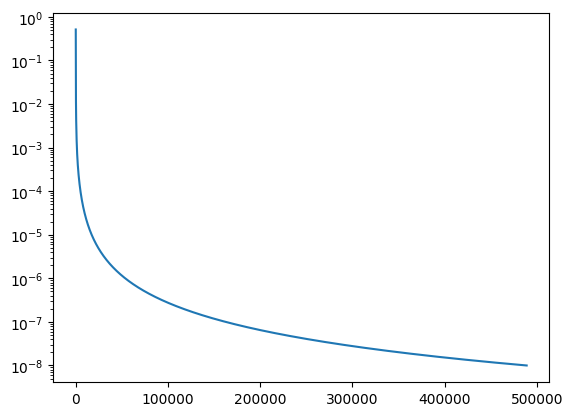

In [155]:
plt.plot(weights_change_history)
plt.yscale('log')

sklearn

In [156]:
regression = LinearRegression()
regression.fit(X_train, y_train)
y_predict_sk = regression.predict(X_test)

Результаты

In [157]:
for i in range(len(y_predict)):
    print(f'{y_predict[i]}\t{y_predict_sk[i]}\t{y_test[i]}')

14.414594948749032	14.414653946920506	9.6
32.59826591705131	32.596437682612915	36.4
44.763729748357136	44.764220268926	50.0
35.249882571982006	35.251188359104	35.1
25.844805303541293	25.844705544494406	25.0
34.69147772495272	34.69168862362118	35.2
16.258731941574084	16.258545508621204	15.6
27.89450869108545	27.895270951621576	28.6
20.51817483100423	20.517366070789716	17.1
31.272997920750036	31.27238391497542	24.8
27.062485831063118	27.063514282434273	24.8
22.46293491452559	22.461537536887732	19.8
21.5100466066375	21.510138547340436	21.7
32.88845996194034	32.890409821364656	28.2
17.10547543973113	17.105743179167334	13.0
19.173939227023308	19.17425916114297	12.5
29.07244207703318	29.07291643016362	22.0
31.112262568435515	31.11418542765154	35.4
23.63537708488163	23.635498141434987	19.4
15.365591167128777	15.364714192711979	13.4
16.278225626300312	16.27865730384028	13.3
21.156400232489148	21.154695252849397	19.3
16.38182132847943	16.38154302342171	20.2
18.68974412303617	18.69009087242259	2

In [158]:
print(f'My MSE: {np.mean((y_predict - y_test) ** 2)}')
print(f'SK MSE: {np.mean((y_predict_sk - y_test) ** 2)}')

print(f'My weights: {weights}')
print(f'SK weights: {[regression.intercept_] + list(regression.coef_)}')

My MSE: 18.084313267987593
SK MSE: 18.084905237663286
My weights: [22.29368421 -0.7988523   1.34316984  0.05351274  0.71698751 -2.20696776
  1.98050346  0.31141379 -3.18418613  3.00702224 -2.1856862  -2.20376358
  0.86391328 -4.09469492]
SK weights: [np.float64(44.895068303248), np.float64(-0.10049011959549897), np.float64(0.05862003255298136), np.float64(0.008021746048543105), np.float64(3.137277063640136), np.float64(-19.283859697562917), np.float64(2.7901994624722817), np.float64(0.011165916090225343), np.float64(-1.50577116413133), np.float64(0.3408299550253851), np.float64(-0.012935744978222946), np.float64(-1.026901898820968), np.float64(0.009104648864860863), np.float64(-0.5557776420018319)]
